In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sales_df = pd.read_csv("/Users/anastasia/Downloads/saas_sales_data_v3.csv")
customer_df = pd.read_csv("/Users/anastasia/Downloads/customer_interactions_data_v3.csv")
sales_df.head()


,Customer_ID,Subscription_Plan,Region,Monthly_Revenue,Monthly_Profit,Churn_Flag,Renewal_Status,Customer_Segment,Signup_Date,Account_Manager
0,CUST0001,Enterprise,South America,9698.09,2515.01,0,Renewed,Mid-Market,2022-10-30,Manager C
1,CUST0002,Basic,Asia,10370.23,1608.20,0,Renewed,SMB,2021-05-13,Manager D
2,CUST0003,Enterprise,Asia,8198.55,2220.95,0,Renewed,Mid-Market,2021-12-13,Manager B
3,CUST0004,Enterprise,North America,6992.86,3933.71,0,Renewed,SMB,2021-07-08,Manager C
4,CUST0005,Basic,Asia,8516.95,3044.23,1,Renewed,Mid-Market,2022-08-01,Manager C


In [27]:
customer_df.head()

,Customer_ID,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Engagement_Level,Product_Usage_Score
0,CUST0001,Support Call,2022-09-15,Yes,1.4,Medium,36.54
1,CUST0001,Renewal Meeting,2021-07-12,No,1.7,Medium,80.59
2,CUST0002,Support Call,2023-08-24,Yes,1.2,High,41.04
3,CUST0002,Renewal Meeting,2021-03-28,No,1.4,Medium,57.60
4,CUST0002,Upsell Meeting,2021-10-28,No,1.0,Medium,25.79


In [29]:
rev_df = sales_df.groupby(["Region", "Customer_Segment"]).agg({
    "Monthly_Revenue":"mean",
    "Monthly_Profit":"mean"
}).rename(columns={
    "Monthly_Revenue":"Avg Monthly Revenue",
    "Monthly_Profit":"Avg Monthly Profit"
})
display(rev_df)

Avg Monthly Revenue  Avg Monthly Profit
Region        Customer_Segment                                         
Africa        Enterprise                7576.126667         3514.243333
              Mid-Market                7378.465714         4124.135714
              SMB                       9431.263333         1794.051667
Asia          Enterprise                8143.082000         2690.740000
              Mid-Market                7668.674444         3060.835556
              SMB                      10001.002222         3856.085556
Europe        Enterprise                9913.272500         4091.255000
              Mid-Market                7347.880000         4804.218333
              SMB                       8385.560000         3564.312500
North America Enterprise                8729.115714         4510.648571
              Mid-Market                6876.353000         2785.925000
              SMB                      11501.640000         3781.041111
South America Enterprise                9143.506667         3789.162500
              Mid-Market                9816.964000         3621.288000
              SMB                       8552.982500         2234.540000

In [45]:
mismatch_df = sales_df[(sales_df["Churn_Flag"]==1) & (sales_df["Renewal_Status"]!="Churned")] 
mismatch_df.head()

,Customer_ID,Subscription_Plan,Region,Monthly_Revenue,Monthly_Profit,Churn_Flag,Renewal_Status,Customer_Segment,Signup_Date,Account_Manager
4,CUST0005,Basic,Asia,8516.95,3044.23,1,Renewed,Mid-Market,2022-08-01,Manager C
5,CUST0006,Basic,Asia,9094.10,3218.06,1,Renewed,Mid-Market,2021-01-04,Manager D
6,CUST0007,Enterprise,North America,1672.37,6769.28,1,Renewed,Enterprise,2021-05-10,Manager A
35,CUST0036,Pro,Asia,3036.85,2692.41,1,Renewed,Enterprise,2021-05-21,Manager C
44,CUST0045,Basic,South America,4543.63,2680.54,1,Renewed,SMB,2023-01-04,Manager B


In [61]:
sales_df["Churn_Flag"] = sales_df["Renewal_Status"].apply(lambda x:1 if x=="Churned" else 0)
sales_df.tail()

,Customer_ID,Subscription_Plan,Region,Monthly_Revenue,Monthly_Profit,Churn_Flag,Renewal_Status,Customer_Segment,Signup_Date,Account_Manager
95,CUST0096,Basic,Europe,5295.88,7598.25,0,Renewed,Mid-Market,2022-11-11,Manager C
96,CUST0097,Basic,Europe,8515.09,7104.78,0,Renewed,SMB,2022-06-08,Manager A
97,CUST0098,Enterprise,South America,8798.24,2161.06,0,Renewed,Enterprise,2021-07-20,Manager B
98,CUST0099,Basic,Africa,14714.81,220.91,0,Renewed,SMB,2022-11-23,Manager A
99,CUST0100,Basic,North America,1592.52,7474.15,1,Churned,Mid-Market,2022-12-16,Manager A


In [63]:
churn_df = sales_df.groupby(["Customer_Segment", "Subscription_Plan"]).agg({
    "Churn_Flag":"sum"
}).rename(columns={
    "Churn_Flag":"Count of Churned Customers"
})
display(churn_df)

Count of Churned Customers
Customer_Segment Subscription_Plan                            
Enterprise       Basic                                       1
                 Enterprise                                  2
                 Pro                                         4
Mid-Market       Basic                                       4
                 Enterprise                                  1
                 Pro                                         2
SMB              Basic                                       1
                 Enterprise                                  0
                 Pro                                         1

In [69]:
total_customers = sales_df.groupby(["Customer_Segment", "Subscription_Plan"]).size()
display(total_customers)

Customer_Segment  Subscription_Plan
Enterprise        Basic                 3
                  Enterprise           14
                  Pro                  14
Mid-Market        Basic                17
                  Enterprise           10
                  Pro                  10
SMB               Basic                13
                  Enterprise            7
                  Pro                  12
dtype: int64

In [75]:
churn_df["Churn_Rate"] = churn_df["Count of Churned Customers"] / total_customers
display(churn_df)

Count of Churned Customers  Churn_Rate
Customer_Segment Subscription_Plan                                        
Enterprise       Basic                                       1    0.333333
                 Enterprise                                  2    0.142857
                 Pro                                         4    0.285714
Mid-Market       Basic                                       4    0.235294
                 Enterprise                                  1    0.100000
                 Pro                                         2    0.200000
SMB              Basic                                       1    0.076923
                 Enterprise                                  0    0.000000
                 Pro                                         1    0.083333

In [89]:
sales_df["Signup_Date"] = pd.to_datetime(sales_df["Signup_Date"])
sales_df["Year"] = sales_df["Signup_Date"].dt.year
sales_df["Month"] = sales_df["Signup_Date"].dt.month
monthly_revenue = sales_df.groupby(["Year", "Month"])["Monthly_Revenue"].sum()
display(monthly_revenue)

Year  Month
2021  1        21170.10
      2         7661.46
      3        16155.00
      4        20331.50
      5        27417.71
      6        45244.75
      7        16923.35
      8        26424.50
      9        38238.78
      10       37887.97
      11       12018.71
      12       46711.94
2022  1         4131.70
      2        23214.21
      3        14319.54
      4        36040.24
      5         7314.20
      6        25332.42
      7        53374.29
      8         8516.95
      9        10811.67
      10       15077.03
      11       42569.08
      12       29570.71
2023  1        28517.74
      2        39952.48
      3        27976.11
      4        34230.58
      5        40546.14
      6        25743.82
      7        10802.54
      8        27916.36
      9        17926.98
      11       13682.68
      12       20638.02
Name: Monthly_Revenue, dtype: float64

In [99]:
monthly_revenue = monthly_revenue.reset_index()

In [103]:
monthly_revenue["Date"] = pd.to_datetime(monthly_revenue[["Year", "Month"]].assign(Day=1))

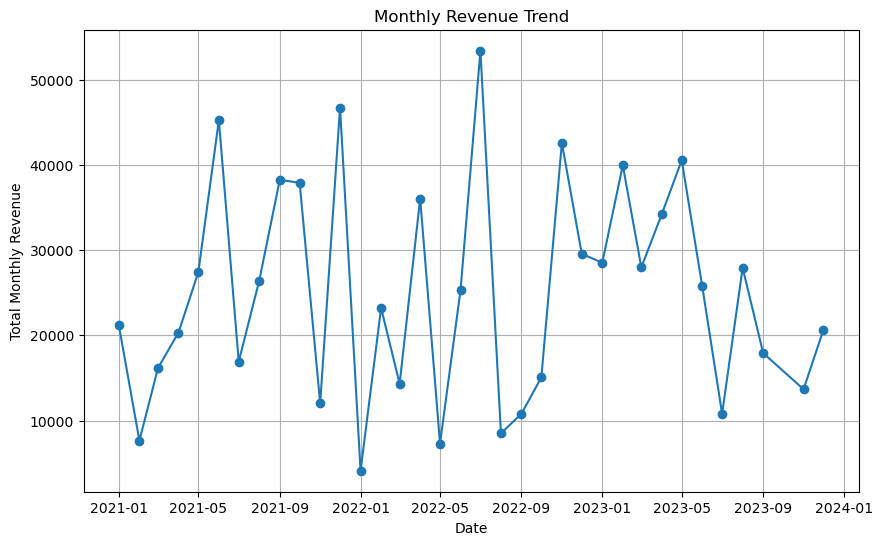

In [105]:
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue["Date"], monthly_revenue["Monthly_Revenue"], marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Monthly Revenue")
plt.grid(True)
plt.show()

In [109]:
top_customers = sales_df.groupby("Customer_ID")["Monthly_Revenue"].mean()
top_10_customers = top_customers.nlargest(10)
display(top_10_customers)

Customer_ID
CUST0040    14945.68
CUST0090    14920.98
CUST0063    14919.63
CUST0012    14759.64
CUST0037    14741.44
CUST0099    14714.81
CUST0077    14693.95
CUST0058    14618.13
CUST0041    14498.58
CUST0095    14319.54
Name: Monthly_Revenue, dtype: float64

In [138]:
renewal_status_distribution = sales_df.groupby("Customer_Segment")["Renewal_Status"].value_counts(normalize=True)
display(renewal_status_distribution*100)
# This value_counts(normalize=True) is a very cool trick and the first time I've used it. Calculates the % of the values appearance

Customer_Segment  Renewal_Status
Enterprise        Renewed           77.419355
                  Churned           22.580645
Mid-Market        Renewed           81.081081
                  Churned           18.918919
SMB               Renewed           93.750000
                  Churned            6.250000
Name: proportion, dtype: float64

In [152]:
rsd_df = renewal_status_distribution.unstack()*100

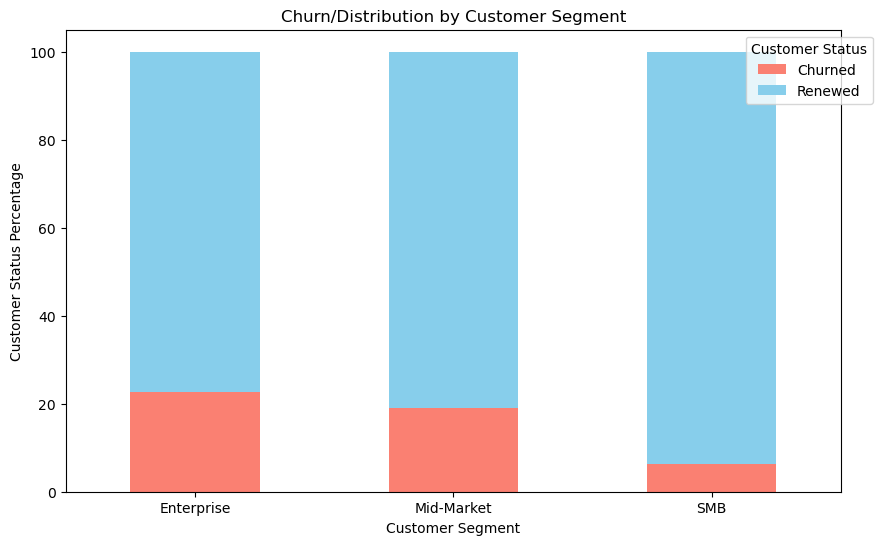

In [156]:
rsd_df.plot(kind="bar", stacked=True, figsize=(10,6), color=["salmon", "skyblue"])
plt.title("Churn/Distribution by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Customer Status Percentage")
plt.xticks(rotation=0)
plt.legend(["Churned", "Renewed"], title="Customer Status", bbox_to_anchor=(1.05,1), loc="upper right")
plt.show()

In [162]:
interaction_CSAT_df = customer_df.groupby("Interaction_Type")["Followup_CSAT_Score"].mean()
display(interaction_CSAT_df)

Interaction_Type
Product Demo       3.042373
Renewal Meeting    2.773684
Support Call       2.908197
Support Ticket     2.948485
Upsell Meeting     2.796875
Name: Followup_CSAT_Score, dtype: float64

In [168]:
customer_df.head()
# awesome, so from here I want to have a look at the Engagement Level, CSAT Scores and Product Usage by Region
# so will need to merge customer and sales dfs on Customer ID

,Customer_ID,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Engagement_Level,Product_Usage_Score
0,CUST0001,Support Call,2022-09-15,Yes,1.4,Medium,36.54
1,CUST0001,Renewal Meeting,2021-07-12,No,1.7,Medium,80.59
2,CUST0002,Support Call,2023-08-24,Yes,1.2,High,41.04
3,CUST0002,Renewal Meeting,2021-03-28,No,1.4,Medium,57.60
4,CUST0002,Upsell Meeting,2021-10-28,No,1.0,Medium,25.79


In [170]:
merged_df = pd.merge(sales_df, customer_df, on="Customer_ID", how="outer")
merged_df.head()

,Customer_ID,Subscription_Plan,Region,Monthly_Revenue,Monthly_Profit,Churn_Flag,Renewal_Status,Customer_Segment,Signup_Date,Account_Manager,Year,Month,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Engagement_Level,Product_Usage_Score
0,CUST0001,Enterprise,South America,9698.09,2515.01,0,Renewed,Mid-Market,2022-10-30,Manager C,2022,10,Support Call,2022-09-15,Yes,1.4,Medium,36.54
1,CUST0001,Enterprise,South America,9698.09,2515.01,0,Renewed,Mid-Market,2022-10-30,Manager C,2022,10,Renewal Meeting,2021-07-12,No,1.7,Medium,80.59
2,CUST0002,Basic,Asia,10370.23,1608.20,0,Renewed,SMB,2021-05-13,Manager D,2021,5,Support Call,2023-08-24,Yes,1.2,High,41.04
3,CUST0002,Basic,Asia,10370.23,1608.20,0,Renewed,SMB,2021-05-13,Manager D,2021,5,Renewal Meeting,2021-03-28,No,1.4,Medium,57.60
4,CUST0002,Basic,Asia,10370.23,1608.20,0,Renewed,SMB,2021-05-13,Manager D,2021,5,Upsell Meeting,2021-10-28,No,1.0,Medium,25.79


In [174]:
regional_engagement = merged_df.groupby("Region")["Engagement_Level"].value_counts(normalize=True)*100
display(regional_engagement)


Region         Engagement_Level
Africa         Low                 43.181818
               Medium              31.818182
               High                25.000000
Asia           Low                 39.130435
               Medium              36.231884
               High                24.637681
Europe         Medium              37.837838
               High                35.135135
               Low                 27.027027
North America  High                34.883721
               Medium              34.883721
               Low                 30.232558
South America  Medium              46.478873
               High                26.760563
               Low                 26.760563
Name: proportion, dtype: float64

In [176]:
regional_summary = merged_df.groupby("Region").agg({
      "Product_Usage_Score":"mean",
      "Followup_CSAT_Score":"mean",
}).rename(columns={
     "Product_Usage_Score":"Avg_Product_Usage_Score",
      "Followup_CSAT_Score":"Avg_Followup_CSAT_Score",
})

In [184]:
regional_metrics = pd.merge(regional_summary, regional_engagement, left_index=True, right_index=True)
display(regional_metrics)

#definitely think this is probably overcomplicating it! Maybe have a look and group a df by Engagement Level & Region? Trying that next

Avg_Product_Usage_Score  \
Region        Engagement_Level                            
Africa        Low                             54.570455   
              Medium                          54.570455   
              High                            54.570455   
Asia          Low                             50.645362   
              Medium                          50.645362   
              High                            50.645362   
Europe        Medium                          44.107568   
              High                            44.107568   
              Low                             44.107568   
North America High                            51.860000   
              Medium                          51.860000   
              Low                             51.860000   
South America Medium                          50.104085   
              High                            50.104085   
              Low                             50.104085   

                                Avg_Followup_CSAT_Score  proportion  
Region        Engagement_Level                                       
Africa        Low                              2.986364   43.181818  
              Medium                           2.986364   31.818182  
              High                             2.986364   25.000000  
Asia          Low                              2.928986   39.130435  
              Medium                           2.928986   36.231884  
              High                             2.928986   24.637681  
Europe        Medium                           3.000000   37.837838  
              High                             3.000000   35.135135  
              Low                              3.000000   27.027027  
North America High                             2.801163   34.883721  
              Medium                           2.801163   34.883721  
              Low                              2.801163   30.232558  
South America Medium                           2.861972   46.478873  
              High                             2.861972   26.760563  
              Low                              2.861972   26.760563

In [196]:
region_engagement_metrics = merged_df.groupby(["Region", "Engagement_Level"]).agg({
      "Product_Usage_Score":"mean",
      "Followup_CSAT_Score":"mean",
}).rename(columns={
     "Product_Usage_Score":"Avg_Product_Usage_Score",
      "Followup_CSAT_Score":"Avg_Followup_CSAT_Score",
})
display(region_engagement_metrics)

#Aha! A much better and less convoluted way to look at these measures

Avg_Product_Usage_Score  \
Region        Engagement_Level                            
Africa        High                            67.387273   
              Low                             45.991579   
              Medium                          56.142857   
Asia          High                            52.268824   
              Low                             44.340741   
              Medium                          56.350400   
Europe        High                            49.573077   
              Low                             31.287000   
              Medium                          48.190000   
North America High                            56.948333   
              Low                             43.628462   
              Medium                          53.905667   
South America High                            42.066316   
              Low                             53.724211   
              Medium                          52.647576   

                                Avg_Followup_CSAT_Score  
Region        Engagement_Level                           
Africa        High                             3.054545  
              Low                              2.847368  
              Medium                           3.121429  
Asia          High                             2.929412  
              Low                              3.085185  
              Medium                           2.760000  
Europe        High                             3.338462  
              Low                              2.170000  
              Medium                           3.278571  
North America High                             2.856667  
              Low                              3.280769  
              Medium                           2.330000  
South America High                             3.094737  
              Low                              3.078947  
              Medium                           2.603030

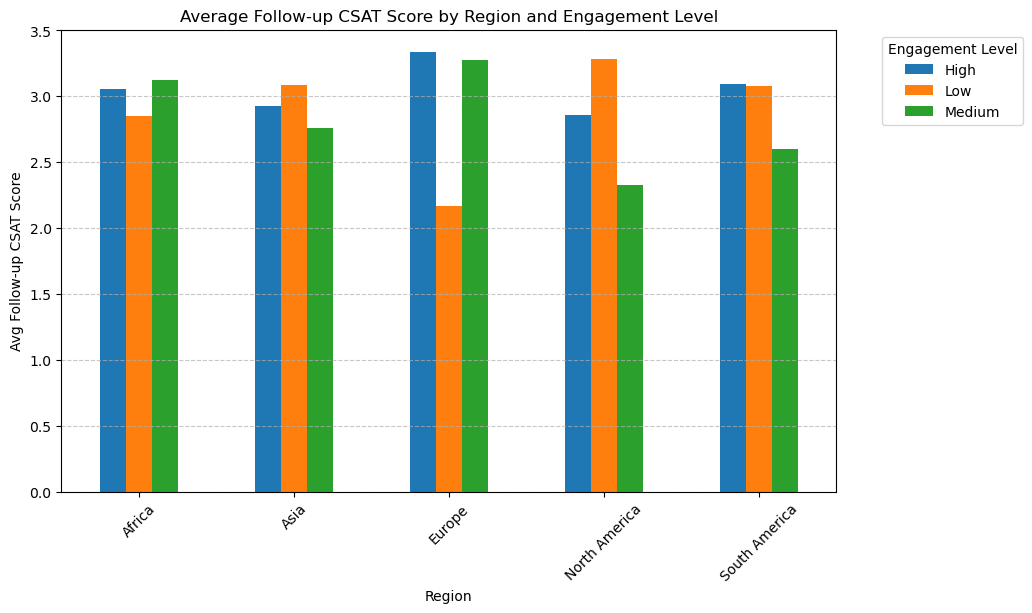

In [200]:
regional_engagement_metrics_unstacked = region_engagement_metrics.unstack(level="Engagement_Level")
regional_engagement_metrics_unstacked["Avg_Followup_CSAT_Score"].plot(kind="bar", figsize=(10,6))
plt.title("Average Follow-up CSAT Score by Region and Engagement Level")
plt.xlabel("Region")
plt.ylabel("Avg Follow-up CSAT Score")
plt.legend(title="Engagement Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# this is for us to have a look at how unstacking an index impacts our plotting of data. Unstacked will follow next cell

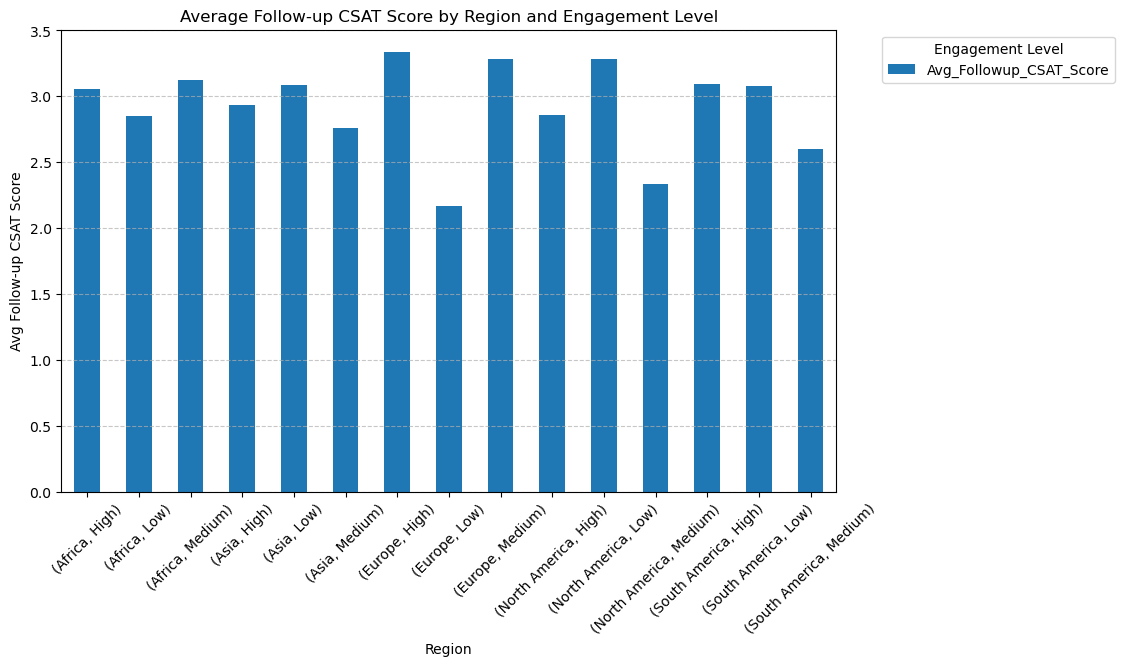

In [202]:
region_engagement_metrics["Avg_Followup_CSAT_Score"].plot(kind="bar", figsize=(10,6))
plt.title("Average Follow-up CSAT Score by Region and Engagement Level")
plt.xlabel("Region")
plt.ylabel("Avg Follow-up CSAT Score")
plt.legend(title="Engagement Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#WOWZA - that is a serious and significant difference. Gamechanger!